# Polynomial Data Analysis

Analysing and sampling the polynomial dataset.
<br>
Equation used to generate the data:
<br>
w_11 * __Age__ + w_21 * __Dependents__ + w_22 * __Annual_income__ * __Age__ + w_31 * __Monthly_loans__ * __Age__ * __Dependents__ + w_32* __Income_stability__ + w_41 * __Portfolio_status__ * __Age__ * __Dependents__ * __Duration_inv__ + w_51 * __Investment_obj__ * __Age__ * __Dependents__ * __Duration_inv__ + w_52 * __Duration_inv__ * __Investment_obj__ * __Age__ * __Dependents__ + w_61 * __Comfort__ * __Age__ * __Dependents__ +
w_62* __Behaviour__ * __Dependents__ = Output

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_1 = pd.read_csv("x_11_1_poly.csv")
df_05 = pd.read_csv("x_11_05_poly.csv")
df_02 = pd.read_csv("x_11_02_poly.csv")

In [5]:
poly_df =pd.concat([df_1,df_05,df_02])
poly_df = poly_df[['Age','Dependents','Annual_income','Monthly_loans','Income_stability','Portfolio_status','Investment_obj','Duration_inv','Comfort','Behaviour','output']]

##### Dataset

In [6]:
poly_df.head()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output
0,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.2,4.03750
1,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.3,4.04075
2,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.5,4.04725
3,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.9,4.06025
4,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,1.0,4.06350


##### Dataset Statistics

In [9]:
poly_df.shape

(3750000, 11)

In [7]:
poly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750000 entries, 0 to 1249999
Data columns (total 11 columns):
Age                 float64
Dependents          float64
Annual_income       float64
Monthly_loans       float64
Income_stability    float64
Portfolio_status    float64
Investment_obj      float64
Duration_inv        float64
Comfort             float64
Behaviour           float64
output              float64
dtypes: float64(11)
memory usage: 343.3 MB


In [8]:
poly_df.describe()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output
count,3.750000e+06,3.750000e+06,3.750000e+06,3.750000e+06,3.750000e+06,3.750000e+06,3.750000e+06,3750000.00,3.750000e+06,3.750000e+06,3.750000e+06
mean,5.666667e-01,6.250000e-01,6.000000e-01,6.000000e-01,5.000000e-01,5.400000e-01,6.300000e-01,0.65,5.400000e-01,5.800000e-01,2.302217e+00
std,3.299832e-01,3.344772e-01,2.828428e-01,2.828428e-01,3.391165e-01,1.496663e-01,2.039608e-01,0.10,3.611094e-01,3.187476e-01,1.116042e+00
min,2.000000e-01,1.000000e-01,2.000000e-01,2.000000e-01,1.000000e-01,4.000000e-01,4.000000e-01,0.50,1.000000e-01,2.000000e-01,3.943300e-01
25%,2.000000e-01,4.750000e-01,4.000000e-01,4.000000e-01,2.500000e-01,4.000000e-01,5.000000e-01,0.60,2.000000e-01,3.000000e-01,1.464675e+00
50%,5.000000e-01,7.000000e-01,6.000000e-01,6.000000e-01,4.500000e-01,5.000000e-01,6.000000e-01,0.65,5.000000e-01,5.000000e-01,2.085040e+00
75%,1.000000e+00,8.500000e-01,8.000000e-01,8.000000e-01,7.000000e-01,6.000000e-01,6.500000e-01,0.70,9.000000e-01,9.000000e-01,3.024200e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e-01,1.000000e+00,0.80,1.000000e+00,1.000000e+00,6.740000e+00


##### Features(Questions and answers) and scores assigned to each.

In [10]:
for col in poly_df:
    print(col,":Unique Elements: ",poly_df[col].unique(),",Number of unique elements: ",len(poly_df[col].unique()))

Age :Unique Elements:  [1.  0.5 0.2] ,Number of unique elements:  3
Dependents :Unique Elements:  [1.  0.8 0.6 0.1] ,Number of unique elements:  4
Annual_income :Unique Elements:  [0.2 0.4 0.6 0.8 1. ] ,Number of unique elements:  5
Monthly_loans :Unique Elements:  [1.  0.8 0.6 0.4 0.2] ,Number of unique elements:  5
Income_stability :Unique Elements:  [0.1 0.3 0.6 1. ] ,Number of unique elements:  4
Portfolio_status :Unique Elements:  [0.4 0.6 0.5 0.8] ,Number of unique elements:  4
Investment_obj :Unique Elements:  [0.65 0.6  0.4  0.5  1.  ] ,Number of unique elements:  5
Duration_inv :Unique Elements:  [0.5  0.8  0.65 0.6  0.7 ] ,Number of unique elements:  5
Comfort :Unique Elements:  [1.  0.9 0.5 0.2 0.1] ,Number of unique elements:  5
Behaviour :Unique Elements:  [0.2 0.3 0.5 0.9 1. ] ,Number of unique elements:  5
output :Unique Elements:  [4.0375  4.04075 4.04725 ... 1.13282 1.13919 1.1401 ] ,Number of unique elements:  1025287


In [11]:
poly_df.apply(lambda x: len(x.unique()))

Age                       3
Dependents                4
Annual_income             5
Monthly_loans             5
Income_stability          4
Portfolio_status          4
Investment_obj            5
Duration_inv              5
Comfort                   5
Behaviour                 5
output              1025287
dtype: int64

##### Correlations in the total dataset.

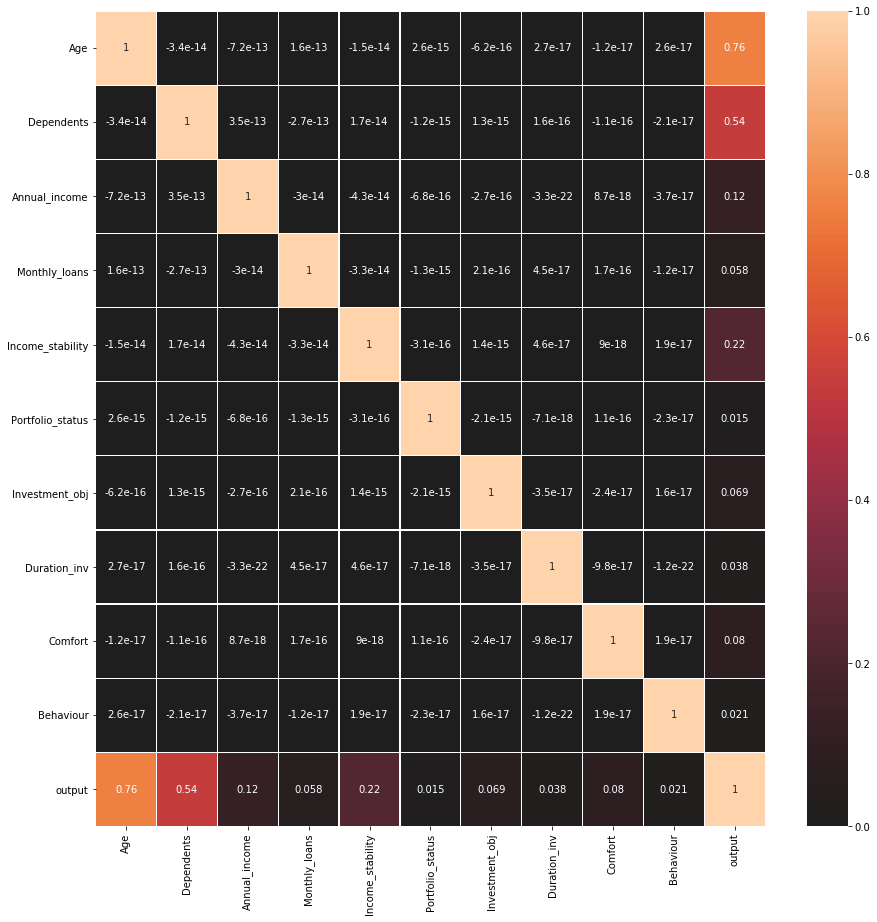

In [5]:
correlation_matrix = poly_df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=.3)

In [6]:
correlation_matrix

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output
Age,1.000000e+00,-3.377068e-14,-7.191090e-13,1.631766e-13,-1.524255e-14,2.555101e-15,-6.228774e-16,2.691615e-17,-1.242327e-17,2.638831e-17,0.760992
Dependents,-3.377068e-14,1.000000e+00,3.514393e-13,-2.681363e-13,1.742707e-14,-1.195217e-15,1.271962e-15,1.609923e-16,-1.057057e-16,-2.115260e-17,0.541066
Annual_income,-7.191090e-13,3.514393e-13,1.000000e+00,-2.988641e-14,-4.334088e-14,-6.767617e-16,-2.660533e-16,-3.271026e-22,8.688981e-18,-3.693970e-17,0.119198
Monthly_loans,1.631766e-13,-2.681363e-13,-2.988641e-14,1.000000e+00,-3.284594e-14,-1.326681e-15,2.069151e-16,4.464898e-17,1.739189e-16,-1.231455e-17,0.058343
Income_stability,-1.524255e-14,1.742707e-14,-4.334088e-14,-3.284594e-14,1.000000e+00,-3.136042e-16,1.364246e-15,4.609630e-17,8.993492e-18,1.930942e-17,0.223878
Portfolio_status,2.555101e-15,-1.195217e-15,-6.767617e-16,-1.326681e-15,-3.136042e-16,1.000000e+00,-2.085583e-15,-7.119477e-18,1.064907e-16,-2.327230e-17,0.015436
Investment_obj,-6.228774e-16,1.271962e-15,-2.660533e-16,2.069151e-16,1.364246e-15,-2.085583e-15,1.000000e+00,-3.483931e-17,-2.411819e-17,1.639400e-17,0.068785
Duration_inv,2.691615e-17,1.609923e-16,-3.271026e-22,4.464898e-17,4.609630e-17,-7.119477e-18,-3.483931e-17,1.000000e+00,-9.838346e-17,-1.161026e-22,0.037970
Comfort,-1.242327e-17,-1.057057e-16,8.688981e-18,1.739189e-16,8.993492e-18,1.064907e-16,-2.411819e-17,-9.838346e-17,1.000000e+00,1.929099e-17,0.080217
Behaviour,2.638831e-17,-2.115260e-17,-3.693970e-17,-1.231455e-17,1.930942e-17,-2.327230e-17,1.639400e-17,-1.161026e-22,1.929099e-17,1.000000e+00,0.021368


##### Correlations with the output column

In [7]:
df_correlations = poly_df.corr()
df_correlations['output'].sort_values(ascending=False)

output              1.000000
Age                 0.760992
Dependents          0.541066
Income_stability    0.223878
Annual_income       0.119198
Comfort             0.080217
Investment_obj      0.068785
Monthly_loans       0.058343
Duration_inv        0.037970
Behaviour           0.021368
Portfolio_status    0.015436
Name: output, dtype: float64

##### The minima and maxima of the output generated.

In [8]:
print(poly_df.output.min(), poly_df.output.max())

0.39433 6.740000000000002


##### The plot shows the distribution of the output

The polynomial equation gives a range of outcomes. The output values need to be divided into 5 categories. No risk, low risk, moderate risk, likes risk and high risk.


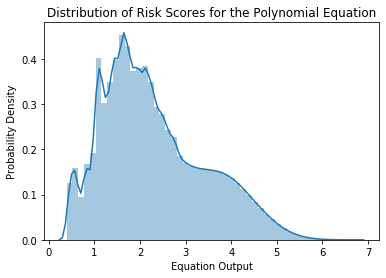

In [9]:
sns.distplot(poly_df.output,label="Distribution of Risk Scores")
plt.title("Distribution of Risk Scores for the Polynomial Equation")
plt.xlabel("Equation Output")
plt.ylabel("Probability Density")
plt.show()

Based on the above distribution the five categories are made using the following boundary conditions:
<br>
No Risk: output values below 1.5
<br>
Low Risk: 1.5 to 2.3
<br>
Moderate Risk: 2.3 to 3.3
<br>
Likes Risk: 3.3 to 4.3
<br>
High Risk: 4.3 above

In [10]:
df=poly_df
#Creating a new column with same values as output
df = df.assign(categories = df['output'])
#All observations below 1.5 in output column will get marked as category 1
df.loc[df['output'] <= 1.5, 'categories'] = 1
#Observations from 1.5 to 2.3 marked as category 2
df.loc[(df['output'] > 1.5) & (df['output'] <= 2.3) , 'categories'] = 2
#Observations from 2.3 to 3.3 marked as category 3
df.loc[(df['output'] > 2.3) & (df['output'] <= 3.3) , 'categories'] = 3
#Observations from 3.3 to 4.3 marked as category 4
df.loc[(df['output'] > 3.3) & (df['output'] <= 4.3) , 'categories'] = 4
#Observations above 4.3 marked as category 5
df.loc[df['output']>4.3, 'categories'] = 5

##### Distribution after division into categories.

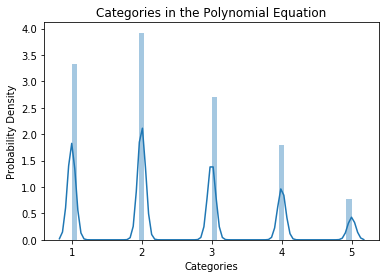

In [11]:
sns.distplot(df.categories)
plt.title("Categories in the Polynomial Equation")
plt.xlabel("Categories")
plt.ylabel("Probability Density")
plt.show()

Number of elements in each category.

In [12]:
df.categories.value_counts()

2.0    1176069
1.0     996032
3.0     808223
4.0     536121
5.0     233555
Name: categories, dtype: int64

##### Stratified Sampling

A balanced sample is given to the regulator. The sample gives a small but complete representation of the dataset.


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3,test_size=0.3,random_state=42)
for train_index,test_index in split.split(df,df['categories']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

Here 30% of the dataset is taken finally. Both the datasets are similar as they exibhit similar correlations and variations and similar correlations with the output columns. This helps prove taking a small part of the dataset can be an adequately accurate represenatation.

In [14]:
strat_test_set.head()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output,categories
728640,0.2,0.6,0.4,0.4,0.3,0.4,1.0,0.50,0.2,0.2,1.122540,1.0
567846,1.0,0.8,1.0,1.0,0.3,0.4,0.4,0.60,0.1,0.3,3.704280,4.0
925930,1.0,0.6,1.0,0.2,0.1,0.6,0.4,0.65,0.9,0.2,3.220670,3.0
971065,0.5,0.1,0.2,0.6,0.6,0.4,0.5,0.65,0.2,0.2,1.117035,1.0
712903,1.0,0.6,0.4,0.6,0.1,0.4,0.5,0.80,1.0,0.9,3.033080,3.0


##### Variations of the divisions are similar


In [15]:
strat_train_set.var()

Age                 0.108914
Dependents          0.111838
Annual_income       0.079976
Monthly_loans       0.079981
Income_stability    0.114981
Portfolio_status    0.022393
Investment_obj      0.041631
Duration_inv        0.010000
Comfort             0.130438
Behaviour           0.101605
output              1.245869
categories          1.434862
dtype: float64

In [16]:
strat_test_set.var()

Age                 0.108831
Dependents          0.111962
Annual_income       0.080055
Monthly_loans       0.080044
Income_stability    0.115045
Portfolio_status    0.022416
Investment_obj      0.041528
Duration_inv        0.010001
Comfort             0.130311
Behaviour           0.101588
output              1.244808
categories          1.434858
dtype: float64

##### There is a large difference in shapes of the datasets


In [17]:
print( strat_train_set.shape,strat_test_set.shape)

(2625000, 12) (1125000, 12)


##### Correlations with the output and category column.

Should be similar.


In [18]:
strat_test = strat_test_set.corr()
strat_test['output'].sort_values(ascending=False)

output              1.000000
categories          0.966746
Age                 0.761121
Dependents          0.541031
Income_stability    0.223495
Annual_income       0.120842
Comfort             0.079115
Investment_obj      0.067944
Monthly_loans       0.057236
Duration_inv        0.039008
Behaviour           0.021372
Portfolio_status    0.016027
Name: output, dtype: float64

##### Correlations of the new dataset

In [19]:
strat_test['categories'].sort_values(ascending=False)

categories          1.000000
output              0.966746
Age                 0.742770
Dependents          0.516709
Income_stability    0.214954
Annual_income       0.109562
Comfort             0.074225
Investment_obj      0.063204
Monthly_loans       0.053320
Duration_inv        0.036067
Behaviour           0.018715
Portfolio_status    0.014864
Name: categories, dtype: float64

Output file of the sample chosen.

In [20]:
#strat_test_set.to_csv("poly_stratified_sample_27nov2019.csv")

##### Number of data points in all categories in the final dataset

In [21]:
strat_test_set.categories.value_counts()

2.0    352821
1.0    298810
3.0    242467
4.0    160836
5.0     70066
Name: categories, dtype: int64